# 計算年輕人想要購買公寓,需要存錢多久才付的起房屋的頭期款(大約總房價的30%)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression 
from ipywidgets import interact

### 使用者輸入資訊
### 包括以下三項 "每個月的薪水" , "想要買房的地方" , "每月從薪水存下多少比例"

* 薪水

In [2]:
def f(x):
    return x
print('Input your monthly salary')
salary = input('>> ')

Input your monthly salary
>> 50000


* 想要居住的地方

In [3]:
def f(y):
    return y
place_input= interact(f, y=['台北', '新北', '桃園','基隆','宜蘭'])

interactive(children=(Dropdown(description='y', options=('台北', '新北', '桃園', '基隆', '宜蘭'), value='台北'), Output())…

* 預期撥出多少比例的薪水來當房屋頭期款的資金

In [5]:
def f(z):
    return z
pay_rate = interact(f, z=(0.1, 0.50,0.01));

interactive(children=(FloatSlider(value=0.30000000000000004, description='z', max=0.5, min=0.1, step=0.01), Ou…

參考資料:[內政部不動產資訊平台](https://pip.moi.gov.tw/V2/E/SCRE0301.aspx)

In [6]:
df0_Taipei = pd.read_excel('/home/endlessric/Python_work/Taipei.xls')
df0_New_Taipei = pd.read_excel('/home/endlessric/Python_work/New_Taipei.xls')
df0_Keelung = pd.read_excel('/home/endlessric/Python_work/Keelung.xls')
df0_Taoyuan = pd.read_excel('/home/endlessric/Python_work/Taoyuan.xls')
df0_Yilan = pd.read_excel('/home/endlessric/Python_work/Yilan.xls')

# 整理資料格式

In [7]:
col_name = ["時間","買賣契約價格平均總價"]
df0_Taipei.columns = col_name
df0_New_Taipei.columns = col_name
df0_Keelung.columns = col_name
df0_Taoyuan.columns = col_name
df0_Yilan.columns = col_name

In [8]:
df_Taipei = df0_Taipei.loc[3:]
df_New_Taipei = df0_New_Taipei.loc[3:]
df_Keelung = df0_Keelung.loc[3:]
df_Taoyuan = df0_Taoyuan.loc[3:]
df_Yilan = df0_Yilan.loc[3:]

# 整理過後的資料,在Data frame上呈現

In [9]:
df_Taipei.head()

,時間,買賣契約價格平均總價
3,107Q4,1403.3
4,107Q3,1442.5
5,107Q2,1424.1
6,107Q1,1441.2
7,106Q4,1452.7


# 發現較早之前得數據差異值比較大(100年初),因此只擷取近20筆資料


In [10]:
df_Taipei = df0_Taipei.loc[3:22]
df_New_Taipei = df0_New_Taipei.loc[3:22]
df_Taoyuan = df0_Taoyuan.loc[3:22]
df_Keelung = df0_Keelung.loc[3:22]
df_Yilan = df0_Yilan.loc[3:22]

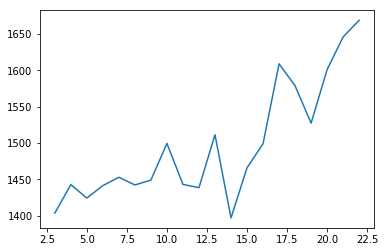

In [11]:
df_Taipei.買賣契約價格平均總價.plot()

# 使用linear regression去fit出一組model,並用Model去預測下一季的房價

In [12]:
def get_model(df_name,place):
    model = LinearRegression()
    y = df_name[["買賣契約價格平均總價"]]
    #Date
    Date = 21-np.arange(1,21)
    Date = Date.reshape(len(Date), 1)
    
    model.fit(Date,y)
    Y_pred = model.predict(Date)
    value = model.predict(len(Date)+1)
    plt.scatter(Date,y)
    plt.plot(Date,Y_pred,'r',linewidth=3)
    plt.scatter(len(Date)+1,value,c = 'green')
    return value

桃園 目前房價 =  373 萬
頭期款付房價的30% = 111.89999999999999 萬


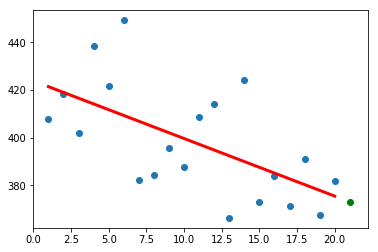

In [13]:
place = place_input.widget.result
if place == '台北':
    price = get_model(df_Taipei,"Taipei")
elif place == '新北':
    price = get_model(df_New_Taipei,"New_Taipei")
elif place == '桃園':
    price = get_model(df_Taoyuan,"Taoyuan")
elif place == '基隆':
    price = get_model(df_Keelung,"Keelung")
elif place == '宜蘭':
    price = get_model(df_Yilan,"Yilan")
print(place,"目前房價 = ",int(price),"萬")
print("頭期款付房價的30% =",int(price)*0.3,"萬")



In [14]:
year_to_buy = int(price)*1000*0.3 / int(salary) * 14 * float(pay_rate.widget.result)
year_to_buy = round(year_to_buy,3)

In [15]:
print("---------我的夢想清單---------")
print("每月賺",salary)
print("每月存下",pay_rate.widget.result*100,"%" , "的薪水比例")
print("想要在",place,"購房")
print("----------------------------")
print("總共花",year_to_buy,"年即可支付房屋頭期款")

---------我的夢想清單---------
每月賺 50000
每月存下 30.0 % 的薪水比例
想要在 桃園 購房
----------------------------
總共花 9.4 年即可支付房屋頭期款
